# Analyze Electrooculography (EOG)

This example can be referenced by [citing the package](https://neuropsychology.github.io/NeuroKit/cite_us.html).

This example shows how to use NeuroKit to analyze EOG data.

In [2]:
# Load NeuroKit and other useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

In [ ]:
# Note: this cell is hidden using the "remove-input" tag
# Make bigger images
plt.rcParams['figure.figsize'] = [15, 5]  
plt.rcParams['font.size']= 14

## Explore the EOG signal

Let's load the example dataset corresponding to a vertical EOG signal.

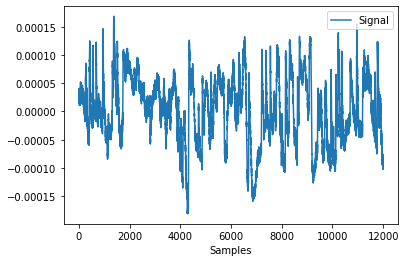

In [2]:
eog_signal = nk.data('eog_100hz.csv')

nk.signal_plot(eog_signal)

Let's zoom in to some areas where clear blinks are present.

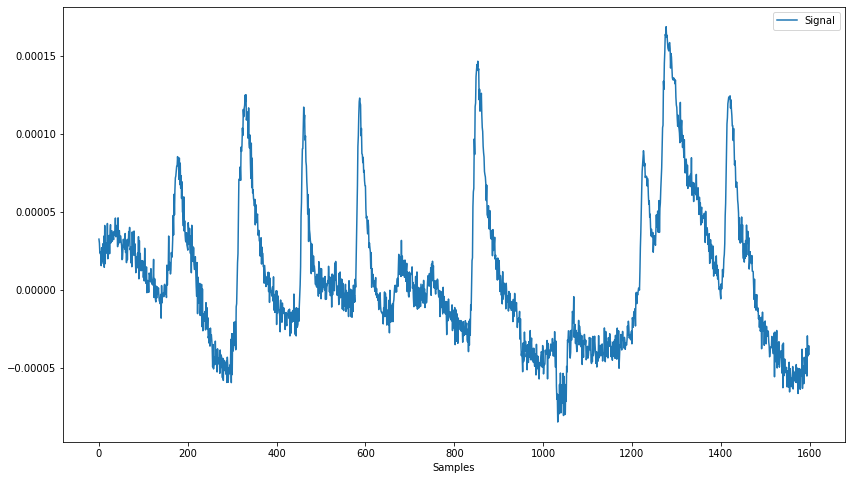

In [5]:
nk.signal_plot(eog_signal[100:1700])

## Clean the signal

We can now filter the signal to remove some noise and trends.

In [6]:
eog_cleaned = nk.eog_clean(eog_signal, sampling_rate=100, method='neurokit')

Let's visualize the same chunk and compare the clean version with the original signal.

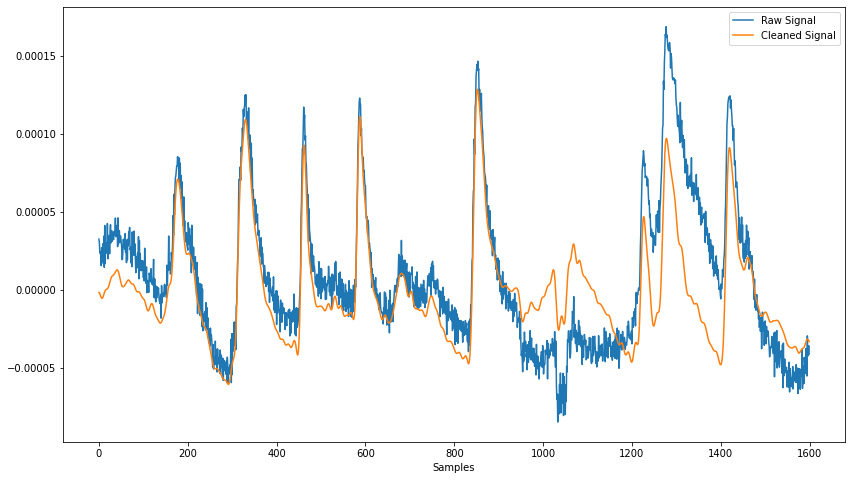

In [8]:
nk.signal_plot([eog_signal[100:1700], eog_cleaned[100:1700]], 
               labels=["Raw Signal", "Cleaned Signal"])

## Detect and visualize eye blinks

We will nor run a peak detection algorithm to detect peaks location.

In [9]:
blinks = nk.eog_findpeaks(eog_cleaned, sampling_rate=100, method="mne")
blinks

array([  277,   430,   562,   688,   952,  1378,  1520,  1752,  3353,
        3783,  3928,  4031,  4168,  4350,  4723,  4878,  5213,  5365,
        5699,  5904,  6312,  6539,  6714,  7224,  7382,  7553,  7827,
        8014,  8154,  8312,  8626,  8702,  9140,  9425,  9741,  9948,
       10142, 10230, 10368, 10708, 10965, 11256, 11683, 11775],
      dtype=int64)

In [10]:
events = nk.epochs_create(eog_cleaned, blinks, sampling_rate=100, epochs_start=-0.3, epochs_end=0.7)

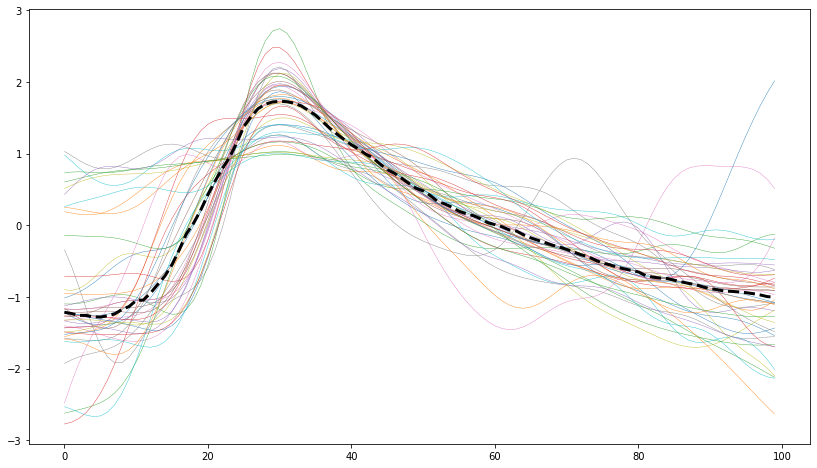

In [11]:
data = nk.epochs_to_array(events)  # Convert to 2D array
data = nk.standardize(data)  # Rescale so that all the blinks are on the same scale

# Plot with their median (used here as a robust average)  
plt.plot(data, linewidth=0.4)
plt.plot(np.median(data, axis=1), linewidth=3, linestyle='--', color="black")